In [12]:
import math
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

In [13]:
def initialize_parameters (n_x, n_h, n_y):
    return {
        "W1":np.random.randn(n_h,n_x) * 0.01,
        "b1":np.random.randn(n_h,1) * 0.01,
        "W2":np.random.randn(n_y,n_h) * 0.01,
        "b2":np.random.randn(n_y,1) * 0.01,
    }

In [14]:
initialize_parameters(4,3,1)

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

sigmoid_on_vector = np.vectorize(sigmoid)

In [15]:
def forward_propagation(X, parameters):
    #Hidden Layer
    Z1 = np.dot(parameters["W1"],X)+parameters["b1"]
    A1 = np.tanh(Z1)
    #Output Layer
    Z2 = np.dot(parameters["W2"],A1)+parameters["b2"]
    A2 = sigmoid_on_vector(Z2)
    cache = {"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2}
    return A2, cache

In [16]:
def backward_propagation(parameters, cache, X, Y):
    samp_count = np.shape(X)[1]
    #Output Layer
    dZ2 = cache["A2"] - Y
    dW2 = (1 / samp_count) * np.dot(dZ2, cache["A1"].T)
    db2 = (1 / samp_count) * np.sum(dZ2, axis=1, keepdims=True)
    #Hidden Layer
    dZ1 = np.multiply(np.dot(parameters["W2"].T, dZ2), 1 - np.power(cache["A1"], 2))
    dW1 = (1 / samp_count) * np.dot(dZ1, X.T)
    db1 = (1 / samp_count) * np.sum(dZ1, axis=1, keepdims=True)
    return {"dW1":dW1,"dW2":dW2,"db1":db1,"db2":db2}

In [17]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    return {
        "W1": parameters["W1"] - learning_rate*grads["dW1"],
        "W2": parameters["W2"] - learning_rate*grads["dW2"],
        "b1": parameters["b1"] - learning_rate*grads["db1"],
        "b2": parameters["b2"] - learning_rate*grads["db2"],
    }

In [18]:
def cost_calculation(A2,Y):
    samp_count = Y.shape[0]
    cost = (- 1 / samp_count) * np.sum(Y * np.log(A2) + (1 - Y) * (np.log(1 - A2)))  # compute cost
    return cost

In [19]:
def prediction_accurecy(y_pred,y_true):
    return np.mean(y_pred==y_true)

In [20]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.where(A2 > 0.5, 1., 0.)
    return predictions

In [21]:
def nn_model(X, Y, n_h, num_iterations = 10000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
    # Transformation to the model
    X_train, X_test, Y_train, Y_test = X_train.T, X_test.T, Y_train.T, Y_test.T
    parameters = initialize_parameters(n_x=X_train.shape[0],n_h=n_h,n_y=1)
    costs = []
    for i in range(num_iterations):
        A2, cache = forward_propagation(X_train,parameters)
        cost = cost_calculation(A2,Y_train)
        grads = backward_propagation(parameters,cache,X_train,Y_train)
        parameters = update_parameters(parameters,grads)
        costs.append(cost)
        # if i % 100 == 0:
        #     print (f"Cost after iteration {i}: {cost}")
    #prediction and accuracy check        
    Y_train_predict = predict(parameters,X_train)
    train_acc = prediction_accurecy(Y_train_predict,Y_train)
    Y_test_predict = predict(parameters,X_test)
    test_acc = prediction_accurecy(Y_test_predict,Y_test)
    parameters["train_accuracy"] = train_acc
    parameters["test_accuracy"] = test_acc
    return parameters

In [ ]:
df = pd.read_csv('diabetes.csv')
features = df.drop(['Outcome'], axis = 1 )
features = ((features - features.mean())/features.std())
X = np.array(features)
Y = np.array(df['Outcome'])
scores = []
for i in tqdm(range(1,20)):
    res = nn_model(X=X,Y=Y,n_h=i)
    scores.append({"Hidden layer size":i,"Train score":res["train_accuracy"],"Test score":res["test_accuracy"]})

C:\Users\motibz\Anaconda3\envs\DM\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\motibz\Anaconda3\envs\DM\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


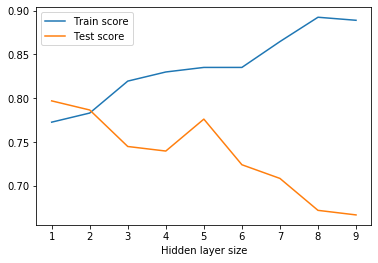

In [23]:
score_rate_df = pd.DataFrame.from_dict(scores, orient='columns', dtype=None)
score_rate_df.set_index("Hidden layer size").plot()